####Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pca = PCA(n_components=2)
pca_result = pca.fit_transform(df11)
df_pca = pd.DataFrame(pca_result,columns=['PC1','PC2'])

explained_variance_ratio = pca.explained_variance_ratio_

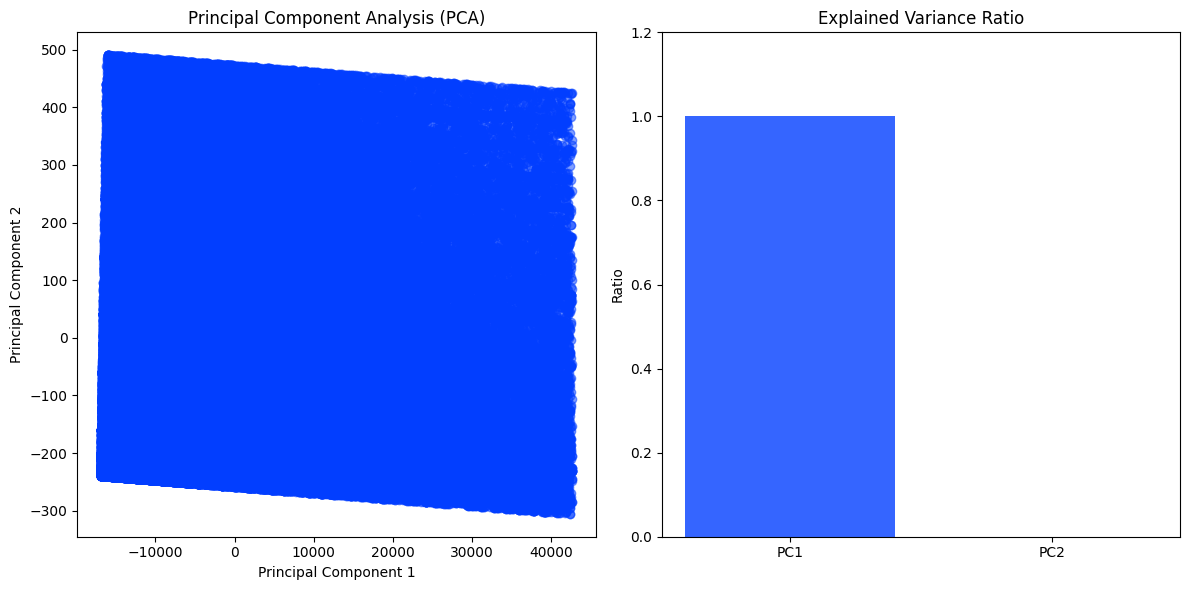

In [ ]:
#Plotting PCA Result
plt.figure(figsize=(12,6))

#Scatter plot of PCA components
plt.subplot(1,2,1)
plt.scatter(df_pca['PC1'],df_pca['PC2'],alpha=0.5)
plt.title('Principal Component Analysis (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#Bar plot of explained variance ratio
plt.subplot(1,2,2)
plt.bar(['PC1','PC2'],explained_variance_ratio,alpha=0.8)
plt.title('Explained Variance Ratio')
plt.ylabel('Ratio')
plt.ylim(0,1.2)

plt.tight_layout()
plt.show()

In [ ]:
print(f'Explained variance ratio of PC1: {explained_variance_ratio[0]}')
print(f'Explained variance ratio of PC2: {explained_variance_ratio[1]}')

Explained variance ratio of PC1: 0.9998310884402466
Explained variance ratio of PC2: 0.00016876066325323608


In [ ]:
#Check if there is significant difference in average CustAccountBalance between male and female customers
from scipy import stats

male_customers = df11[df11['CustGender'] == 0]['CustAccountBalance']
female_customers = df11[df11['CustGender'] == 1]['CustAccountBalance']

t_stat,p_val = stats.ttest_ind(male_customers,female_customers)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')

alpha = 0.05
if p_val < alpha:
  print("Reject the null hypothesis: There is a significant difference in average CustAccountBalance between male and female customers.")
else:
  print('Fail to reject null hypothesis: There is no significant difference in average CustAccountBalance between male and female customers.')

T-statistic: 22.271332007757593
P-value: 9.600468627422153e-110
Reject the null hypothesis: There is a significant difference in average CustAccountBalance between male and female customers.


In [ ]:
#Check if there is significant difference in average TransactionAmount between male and female customers


male_customers = df11[df11['CustGender'] == 0]['TransactionAmount']
female_customers = df11[df11['CustGender'] == 1]['TransactionAmount']

t_stat,p_val = stats.ttest_ind(male_customers,female_customers)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')

alpha = 0.05
if p_val < alpha:
  print("Reject the null hypothesis: There is a significant difference in average Transaction Amount between male and female customers.")
else:
  print('Fail to reject null hypothesis: There is no significant difference in average Transaction Amount between male and female customers.')

T-statistic: 18.996582140105033
P-value: 2.150762381318381e-80
Reject the null hypothesis: There is a significant difference in average Transaction Amount between male and female customers.


In [ ]:
#Prepare the data for ANOVA
#Group data by 'Age' and calculate the mean 'Customer Account Balance' for each month
import statsmodels.api as sm
from statsmodels.formula.api import ols

anova_data = df11[['CustAccountBalance','Age']]

#Perform ANOVA
model = ols('CustAccountBalance ~ C(Age)',data=anova_data).fit()
anova_table = sm.stats.anova_lm(model,typ=3)

print(anova_table)

                 sum_sq        df           F    PR(>F)
Intercept  1.829417e+09       1.0    8.626923  0.003313
C(Age)     7.077966e+11      32.0  104.304192  0.000000
Residual   4.154130e+13  195895.0         NaN       NaN


In [ ]:
#Check if there is a significant difference in average CustAccountBalance across age groups
alpha = 0.05
p_val = anova_table['PR(>F)'][1]
if p_val < alpha:
  print("Reject the null hypothesis: There is a significant difference in average CustAccountBalance across age groups.")
else:
  print("Fail to reject the null hypothesis: There is no significant difference in average CustAccountBalance across age groups.")

Reject the null hypothesis: There is a significant difference in average CustAccountBalance across age groups.


In [ ]:
anova_data1 = df11[['TransactionAmount','Age']]

#Perform ANOVA
model = ols('TransactionAmount ~ C(Age)',data = anova_data1).fit()
anova_table = sm.stats.anova_lm(model,typ=3)

print(anova_table)

                 sum_sq        df          F         PR(>F)
Intercept  2.455265e+06       1.0  67.450663   2.173207e-16
C(Age)     5.313246e+07      32.0  45.613953  1.022719e-285
Residual   7.130756e+09  195895.0        NaN            NaN


In [ ]:
#Check if there is a significant difference in average Transaction Amount across age groups
alpha = 0.05
p_val = anova_table['PR(>F)'][1]
if p_val < alpha:
  print("Reject the null hypothesis: There is a significant difference in average Transaction Amount across age groups.")
else:
  print("Fail to reject the null hypothesis: There is no significant difference in average Transaction Amount across age groups.")

Reject the null hypothesis: There is a significant difference in average Transaction Amount across age groups.
